In [2]:
import panel as pn
import xarray as xr
import pygmt
import matplotlib.pyplot as plt

pn.extension()

In [ ]:
A = xr.open_dataset('data/saojorge_A_wls_novdiff.nc') #.isel(time=0)
D = xr.open_dataset('data/saojorge_D_wls_novdiff.nc') #.isel(time=0)

print('preparing seasonal medians')
As= A.cum.resample(time='Q').median()
Ds= D.cum.resample(time='Q').median()
print('done')

preparing seasonal medians
done


In [19]:
# just fast solution, but it works
timevals = []
i=0
for a in As.time.values:
    i=i+1
    timevals.append(i-1)

# Make a panel widget for controlling the depth plotted
depth_slider = pn.widgets.DiscreteSlider(name='LOS deformation (mm) in step', options=timevals, value=1)



In [22]:

# Make a function for plotting the depth slice with PyGMT
@pn.depends(depth=depth_slider)
def view(depth: int):
    if depth == 0:
        depth = 1
    fig = pygmt.Figure()
    with fig.subplot(nrows=1, ncols=2, figsize=("30c", "8c")):
        with fig.set_panel(panel=0):
            pygmt.makecpt(cmap="vik", series=[-40,40])
            fig.grdimage(grid=(As[depth]-As[depth-1]), cmap=True, projection="R13c", frame=True)
            fig.colorbar(frame="a5")
            t2=str(As[depth].time.dt.quarter.values)+'.'+str(As[depth].time.dt.year.values)
            t1=str(As[depth-1].time.dt.quarter.values)+'.'+str(As[depth-1].time.dt.year.values)
            fig.text(position="TC", text='ascending frame, between Q'+t1+' and Q'+t2)
        with fig.set_panel(panel=1):
            pygmt.makecpt(cmap="vik", series=[-40,40])
            fig.grdimage(grid=(Ds[depth]-Ds[depth-1]), cmap=True, projection="R13c", frame=True)
            fig.colorbar(frame="a5")
            t2=str(Ds[depth].time.dt.quarter.values)+'.'+str(Ds[depth].time.dt.year.values)
            t1=str(Ds[depth-1].time.dt.quarter.values)+'.'+str(Ds[depth-1].time.dt.year.values)
            fig.text(position="TC", text='descending frame, between Q'+t1+' and Q'+t2)
    return fig

Column
    [0] DiscreteSlider(formatter='%d', name='LOS deformation (..., options=[0, 1, 2, 3, 4, ...], value=1)
    [1] ParamFunction(function)
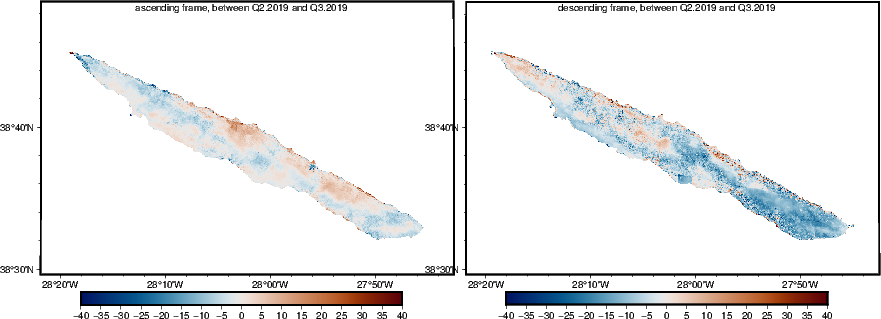

In [23]:
pn.Column(depth_slider, view)

Column
    [0] DiscreteSlider(formatter='%d', name='LOS deformation (mm)', options=[0, 1, 2, 3, 4, ...], value=1)
    [1] ParamFunction(function)
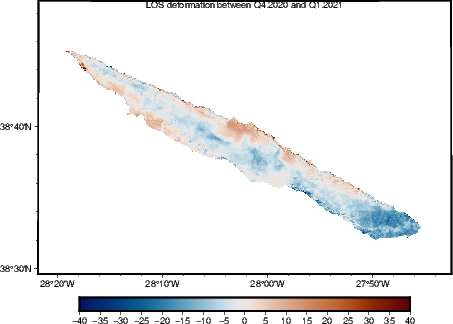

In [48]:
pn.Column(depth_slider, view)